## Self-Case Study -1: Healthcare Provider Fraud Detection Analysis

## Introduction:

#### What is Healthcare Fraud?
Fraud is defined as any deliberate and dishonest act committed with the knowledge that it could result in an unauthorized benefit to the person committing the act or someone else who is similarly not entitled to the benefit. Healthcare fraud is one of the types of fraud.
Here we will analyze and detect “Healthcare Claim Fraud” where the provider fills all the details and makes a claim on behalf of the beneficiary. Provider Fraud is one of the biggest problems that Medicare is facing currently.  Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.
As per the U.S. legislation, an insurance company should pay a legitimate healthcare claim within 30 days. So, there is very less time to properly investigate this. Insurance companies are the most vulnerable institutions impacted due to these bad practices.  As per the Government, the total Medicare spending increased exponentially due to frauds in Medicare claims. 

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:
a)	Billing for services that were not provided.
b)	Duplicate submission of a claim for the same service.
c)	Misrepresenting the service provided.
d)	Charging for a more complex or expensive service than was actually provided.
e)	Billing for a covered service when the service actually provided was not covered.

## Business Problem:

Statistics shows that 15% of the total medicare expense are caused due to fraud claims. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Insuarance premium is also increasing day by day due to this bad practice. 

Our objective is to predict whether a provider is potentially fraudulent or probability score of that provider's fradulent activity and also find the reasons behind it as well to prevent the financial loss.

Depending on the probability score and fradulent reasons insurance company can accept or deny the claim or set up an investigation on that provider.

Find out the important features which are the reasons behind the potentially fraudlent providers. Such as if claim amount is high for a patient whose risk score is low, then it is suspicious.

Not only the financial loss is a great concern but also to protect the healthcare system so that they can provide quality and safe care to legitimate patients.

## ML Formulation:

Build a binary classification model based on the claims filled by the provider along with Inpatient data, Outpatient data, Beneficiary details to predict whether the provider is potentially fraudulent or not.

## Business Constraints:

1. Cost of misclassification is very high. False Negative and False Positive should be as low as possible.If fraudulent providers are predicted as non-fraudulent (False Negative) it is a huge financial loss to the insurer and if legitimate providers are predicted as fraudulent (False Positive) it will cost for investigation and also it's a matter of reputation of the agency.
2. Model interpretability is very important because the agency or insurer should justify that fraudulent activity and may need to setup a manual investigation. It should not be a black box type prediction.
3. Insurer should pay the claim amount to the provider for legitimate claims within 30 days. So, there is no such strict latency constraints but it should not take more than a day because depending on the output of the model the agency may need to setup an investigation.

In [1]:
import os
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive\Test-1542969243754.csv
archive\Test_Beneficiarydata-1542969243754.csv
archive\Test_Inpatientdata-1542969243754.csv
archive\Test_Outpatientdata-1542969243754.csv
archive\Train-1542865627584.csv
archive\Train_Beneficiarydata-1542865627584.csv
archive\Train_Inpatientdata-1542865627584.csv
archive\Train_Outpatientdata-1542865627584.csv


## Dataset column analysis:

In [2]:
import pandas as pd

Train = pd.read_csv("archive/Train-1542865627584.csv")
Train_Beneficiary = pd.read_csv("archive/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient = pd.read_csv("archive/Train_Inpatientdata-1542865627584.csv")
Train_Outpatient = pd.read_csv("archive/Train_Outpatientdata-1542865627584.csv")

In [3]:
Test = pd.read_csv("archive/Test-1542969243754.csv")
Test_Beneficiary = pd.read_csv("archive/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatient = pd.read_csv("archive/Test_Inpatientdata-1542969243754.csv")
Test_Outpatient = pd.read_csv("archive/Test_Outpatientdata-1542969243754.csv")

In [4]:
Train.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

#### Train-1542865627584.csv:
It consists of provider number and corresponding whether this provider is potentially fraud. Provider ID is the primary key in that table.

In [5]:
Test.columns

Index(['Provider'], dtype='object')

#### Test-1542969243754.csv:
It consists of only the provider number. We need to predict whether these providers are potentially fraud or not.

In [6]:
Train_Outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [7]:
Test_Outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

#### Outpatient Data (Train and Test):
It consists of the claim details for the patients who were not admitted into hospital, who only visited there. Important columns are explained below.

<b>BeneID:</b> It contains the unique id of each beneficiaries i.e patients. <br>
<b>ClaimID:</b> It contains the unique id of the claim submitted by the provider. <br>
<b>ClaimStartDt:</b> It contains the date when the claim started in yyyy-mm-dd format. <br>
<b>ClaimEndDt:</b> It contains the date when the claim ended in yyyy-mm-dd format. <br>
<b>Provider:</b> It contains the unique id of the provider. <br>
<b>InscClaimAmtReimbursed:</b> It contains the amount reimbursed for that particular claim. <br>
<b>AttendingPhysician:</b> It contains the id of the Physicican who attended the patient. <br>
<b>OperatingPhysician:</b> It contains the id of the Physicican who operated the patient. <br>
<b>OtherPhysician:</b> It contains the id of the Physicican other than AttendingPhysician and  OperatingPhysician who treated the patient. <br>
<b>ClmDiagnosisCode:</b> It contains codes of the diagnosis performed by the provider on the patient for that claim. <br>
<b>ClmProcedureCode:</b> It contains the codes of the procedures of the patient for treatment for that particular claim. <br>
<b>DeductibleAmtPaid:</b> It consists of the amount by the patient. That is equal to Total_claim_amount - Reimbursed_amount. <br>

In [8]:
Train_Inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [9]:
Test_Inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

#### Inpatient Data (Train and Test):
It consists of the claim details for the patients who were admitted into hospital. So, it consists 3 extra columns Admission date, Discharge date and Diagnosis Group code.

<b>AdmissionDt:</b> It contains the date on which the patient was admitted into hospital in yyyy-mm-dd format. <br>
<b>DischargeDt:</b> It contains the date on which the patient was discharged from the hospital in yyyy-mm-dd format. <br>
<b>DiagnosisGroupCode:</b> It contains group code for the diagnosis done on the patient.

In [10]:
Train_Beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [11]:
Test_Beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

<b>Beneficiary Data (Train and Test):</b> This data contains beneficiary KYC details like DOB, DOD, Gender, Race, health conditions (Chronic disease if any), State, Country they belong to etc. Columns of this dataset are explained below.

<b>BeneID:</b> It contains the unique id of the beneficiary.<br>
<b>DOB:</b> It contains the Date of Birth of the beneficiary.<br>
<b>DOD:</b> It contains the Date of Death of the beneficiary, if the beneficiary id deal else null.<br>
<b>Gender, Race, State, Country:</b> It contains the Gender, Race, State, Country of the beneficiary.<br>
<b>RenalDiseaseIndicator:</b> It contains if the patient has existing kidney disease.<br>
<b>ChronicCond_*:</b> The columns started with "ChronicCond_" indicates if the patient has existing that particular disease. Which also indicates the risk score of that patient.<br>
<b>IPAnnualReimbursementAmt:</b> It consists of maximun reimbursement amount for hospitalization anually.<br>
<b>IPAnnualDeductibleAmt:</b> It consists of premium paid by the patient for hospitalization anually.<br>
<b>OPAnnualReimbursementAmt:</b> It consists of maximun reimbursement amount for outpatient visit anually.<br>
<b>OPAnnualDeductibleAmt:</b> It consists of premium paid by the patient for outpatient visit anually.<br>

## Performance metric:
As the dataset in healthcare fraud is highly imbalanced(very few fraud cases) accuracy won't be the proper metric. An important initial step will be to plot the confusion matrix. Then we need to check the misclassification i.e. FP and FN. FN means the cases predicted by the model is legitimate but actually it is fraudulent. FP means the cases detected by the model is fraudulent, but actually it is legitimate.

So, the performance metrices are: <br>
<b>1. Confusion Matrix:</b> It is the table where TP, FP, TN, FN counts will be plotted. From this table we can visualize the performance of the model. <br>
<b>2. F1 Score:</b> F1 Score = 2(Precision * Recall)/(Precision + Recall) where Precision = TP/(TP+FP) and Recall = TP/(TP+FN). As F1 score consists of both Precision and Pecall it will be correct metric for this problem. <br>
<b>3. AUC Score:</b> AUC stands for Area Under ROC(Receiver Operating Characteristics) Curve. ROC plots TPR with respect to FPR for different thresholds. The area under the curve depends on the ranking of the predicted probability score, not on absolute values. <br>
<b>4. FPR and FNR:</b> As cost of misclassification is very high, we need to check the FPR and FNR separately, It should be as low as possible.

In [12]:
# count the values of fraud and non fraud providers in the given dataset.
Train.groupby(["PotentialFraud"]).Provider.count()

PotentialFraud
No     4904
Yes     506
Name: Provider, dtype: int64

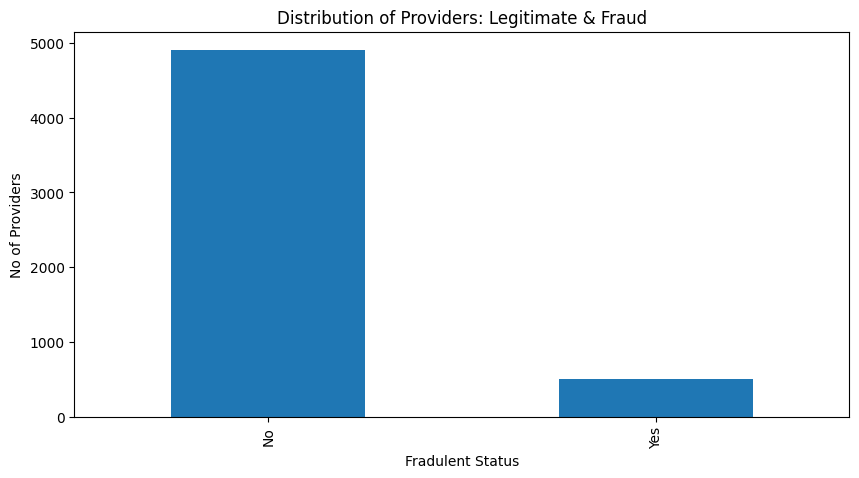

In [13]:
import matplotlib.pyplot as plt

plt.title("Distribution of Providers: Legitimate & Fraud")
Train.groupby(["PotentialFraud"]).Provider.count().plot(kind = "bar", figsize = (10,5))
plt.xlabel('Fradulent Status')
plt.ylabel('No of Providers')
plt.show()

# First Cut Approach
Explain in steps about how you want to approach this problem and the initial experiments that you want to do. (MINIMUM 200 words) <br>

When you are doing the basic EDA and building the First Cut Approach you should not refer any blogs or papers.


<h2>Data Cleaning and EDA</h2>

First I will check each and every dataset provided and try to extract informations from it.

<h4>Provider Dataset:</h4>

I will check the distribution of Fraudulent and Non-Fraudulent claims. I have already checked it and I can see there are 506 fraudulent provider(10%) and 4904 non fraudulent providers(90%), which is a highly imbalanced dataset. To mitigate that imbalance I can use either undersampling or oversampling. In a paper discussed above, random undersampling was used because of the very big size of the input data. But here the data size is not big so, I can use random oversampling technique for my case study. (I will try random undersampling as well to check which one is performing best.)

<h4>Beneficiary Data:</h4>
1. From the KYC details of the beneficiaries I can calculate the age of the patients. For those, whose DOD is not available I will consider the last date available from other dataset.<br>
2. I will check for the other columns if there are any missing values. I need to imputhe the missing values based on domain knowledge or model based approach. If any of the chronic disease field is missing I will apply domin knowledge to impute it with yes or no. If annual reimbursement or annual deductible amount field is missing I can create a regression model to predict these values.<br>
3. From the chronic disease fields of the patient I can calculate the risk score. If the patient has a particular chronic disease it has to be filled with 1 else 0. I can sum up all the columns of chronic disease for a patient to calculate the risk score. Risk score is an important feature in fraud detection. If patient with low risk score is claiming high amount this is suspicious.<br>
4. I will plot countplot of Gender, State, Country to check which are the most occouring in the dataset.<br>
5. I will plot PDF of AnnualDeductible amount and AnnualReimbursed amount to check the distribution and also to find the outliers.<br>

<h4>Inpatient/Outpatient Data:</h4>
1. From the claim start date and claim end date I will calculate total number of days of the claim. If any of the field is missing I will try to apply domain knowledge to impute that. It may be average number of claim date from the other patients or depending on the claim type.
2. For all the Inpatients I need to calculate total number of admitted days in hospital in the similar way.
3. Need to check Claim Reimbursed amount column. If there is any missing values I have to impute that using domain knowledge or model based approach.
4. I will plot the count plot of attending physician, operating ohysician for inpatient as well as outpatient to check which all doctors are treating the patients most.
5. I will plot the PDF of reimbursed amount to check the distribution for inpatient as well as outpatient.
6. Add another column called "TotalNoOfPhysiciansAttended". That is equal to Attending + Operating + Other physicians.
7. I will add another column called "HospitalizationStatus" in both the datasets, for Inpatients I will fill it with 1 and for outpatients with 0. So that after merging these claims can be distinguished.

<h4>Merge Datasets:</h4> I will merge all these datasets to get a global view of the data. First merge Inpatient and Outpatient data based on Claim ID then merge it whih Beneficiary data on BeneficiaryID and then merge the Provider dataset on ProviderID. Now all the data combined in a single dataframe.

<h4>Feature Engineering and EDA after Merging the Datasets:</h4>

<b>EDA:</b>
1. I will plot countplot of Fraudulent and Legitimate claims to check the distribution in the claim data.<br>
2. Now I will plot the countplots separately for Fraudulent and Legitimate claims on state, race, gender to check top types associated with fraudulent claims.<br>
3. Countplot of Attending and Operating phisician separately for Fraudulent and Legitimate claims and check the top attending physians.<br>

<b>Feature Engineering:</b>
1. Calculate average reimbursement received by patient. Average reimbursement = Total reimbursement received/no of claims.<br>
2. Total number of claims per patient.<br>
3. Average number of claim days per parient. Avg no of claim days = Total claim days/ Total no of claims.<br>
4. Average number of hospitalization days per patient. Avg no of days hospitalized = Total No of days hospitalized/No of times hospitalized.<br>

Now group the data based on ProviderID as our objective is to predict potentially fraudulent providers and take the sum of all the features applicabe(Total amount deducted, total amount reimbursed, risk score of patients, chronic conditions, total number of days admitted, total number of days claimed, number of unique claims, number of impatients, total claims for patient, avg no of days patient was admitted, avg no of hospitalization days etc. )

Now I will do feature selection using Random Forest to pick the important features.
So, I will get 2 separate dataframes one with all the features another with only important features. I will use both and pick the best one depending on the performance.

<h2>Performance Metric:</h2>
1. AUC score
2. F1 Score
3. Confusion Matrix
4. Check FPR and FNR separately

<h2>Train-Test Split and Oversampling:</h2>

As our dataset is imbalanced Legitimate:Fraudulent = 90:10, I need to do oversampling. First I will split the data into Train and Test (Because if oversampling is done first, crossvalidation may contain train data) then I will do oversampling to make 4 sets of data with ratio 80:20, 75:25, 65:35 and 50:50.

<h2>Model Selection and Approach to be followed:</h2>

I will use Logistic Regression, Decision Trees, Naive Bayes and SVM for this classification task. For each model, I will do 5 fold cross validation for 10 times then I will take the average. I will compare the scores and pick the best model.

I will do further hyperparameter tuning to get better score.

For further improvement I will use ensemble models.